In [1]:

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

[[  0.         0.         1.      ]
 [  0.         1.         0.613094]
 [  1.         0.         0.612903]
 ...
 [ 78.       101.         0.      ]
 [ 79.       100.         0.      ]
 [ 80.        99.         0.      ]]
179


/home/hermann/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


<IPython.core.display.Javascript object>


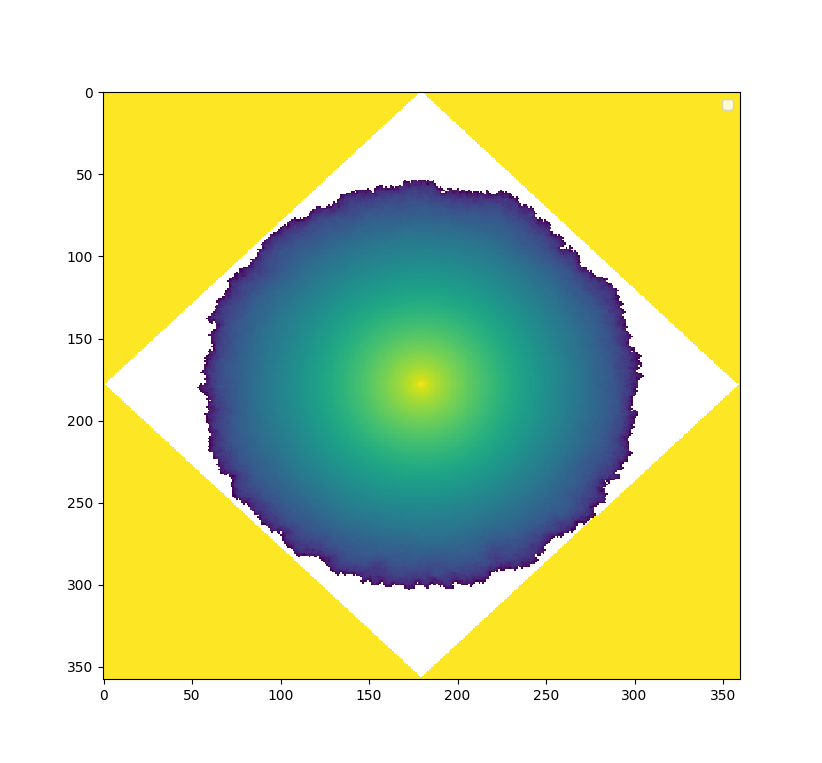

In [3]:
g3 = np.loadtxt("G_0.420000.dat")

print g3
mx = int(max(g3[:,0]))
my = int(max(g3[:,1]))
g3[:,0] += mx
g3[:,1] += my

print my

toplot = np.zeros((2*mx+2,2*my+2))

for i in range(len(g3[:,2])):
    toplot[ int(g3[i,0]) , int(g3[i,1]) ] = np.log(g3[i,2])

plt.figure()
plt.imshow( toplot, aspect='auto' )
plt.legend()

<IPython.core.display.Javascript object>


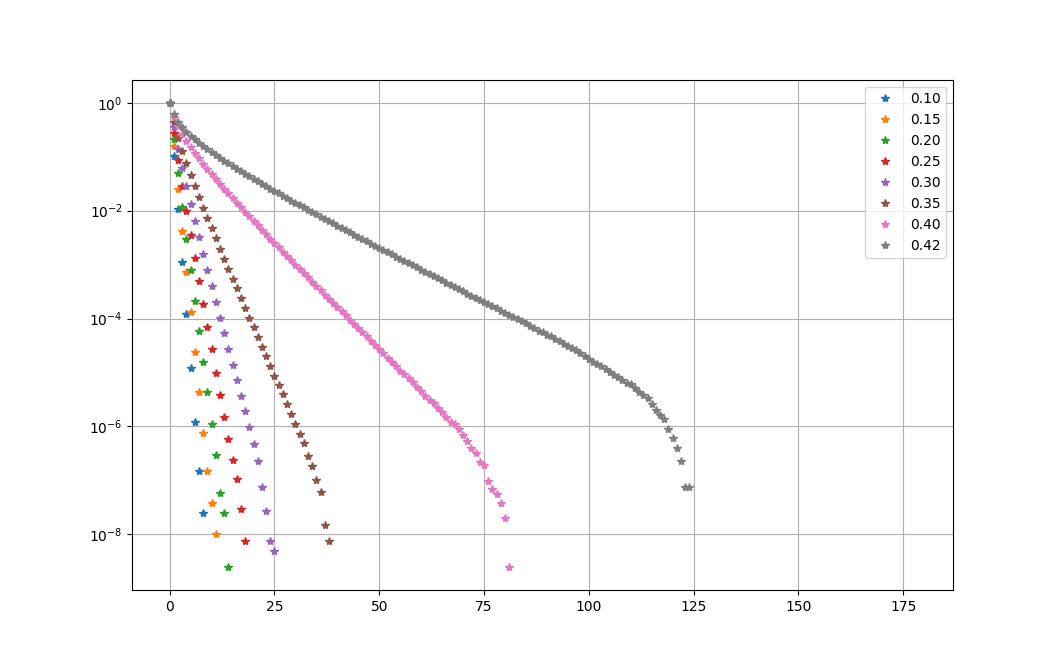

In [2]:
beta_list = ["0.10","0.15","0.20","0.25","0.30", "0.35","0.40", "0.42"]

def load_G(filename):
    g = np.loadtxt(filename)
    
    G = np.array([g[0,2]])

    on_x_axis = g[:,0]==0
    on_y_axis = g[:,1]==0

    for i in range(1, g[on_x_axis, 1].shape[0]/2):
        gx = 0.5 * (g[on_x_axis, 2][i*2-1] + g[on_x_axis, 2][i*2])
        gy = 0.5 * (g[on_y_axis, 2][i*2-1] + g[on_y_axis, 2][i*2])
        G = np.append(G, 0.5 * (gx + gy) )
    return G

Gs = {}
for beta in beta_list:
    Gs[beta] = load_G("G_"+beta+"0000.dat")

plt.figure()
for beta in beta_list:
    plt.semilogy(Gs[beta], '*', label=beta)

plt.grid()
plt.legend()